# MAE と RMSE を実装する

---

## 実装してみる

### 必要なパッケージを読み込む

In [1]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### MAE を計算する

In [2]:
calc_mae <-
  function(data) {
    data %>%
    # 残差を求める
    mutate(e = y - predicted) %>%
    # 残差の絶対値を取る
    mutate(ae = abs(e)) %>%
    # 残差の2乗の平均を取る (MAE)
    summarise(mae = mean(ae)) %>%
    .$mae
  }

### RMSE を計算する

In [3]:
calc_rmse <-
  function(data) {
    data %>%
    # 残差を求める
    mutate(e = y - predicted) %>%
    # 残差を2乗する
    mutate(se = e^2) %>%
    # 残差の2乗の平均を取る (MSE)
    summarise(mse = mean(se)) %>%
    # 残差の2乗の平均の平方根を取る (RMSE)
    mutate(rmse = sqrt(mse)) %>%
    .$rmse
  }

---

## 実際に指標を計算してみる

### サンプルデータを生成する

In [4]:
# 再現性確保のため、乱数のシードを固定する
set.seed(0)

# サンプルデータを生成する
data <-
  tibble(
    x = runif(n = 100, min = -5, max = 5),
    y = x + rnorm(n = 100, mean = 0, sd = 1)
  )

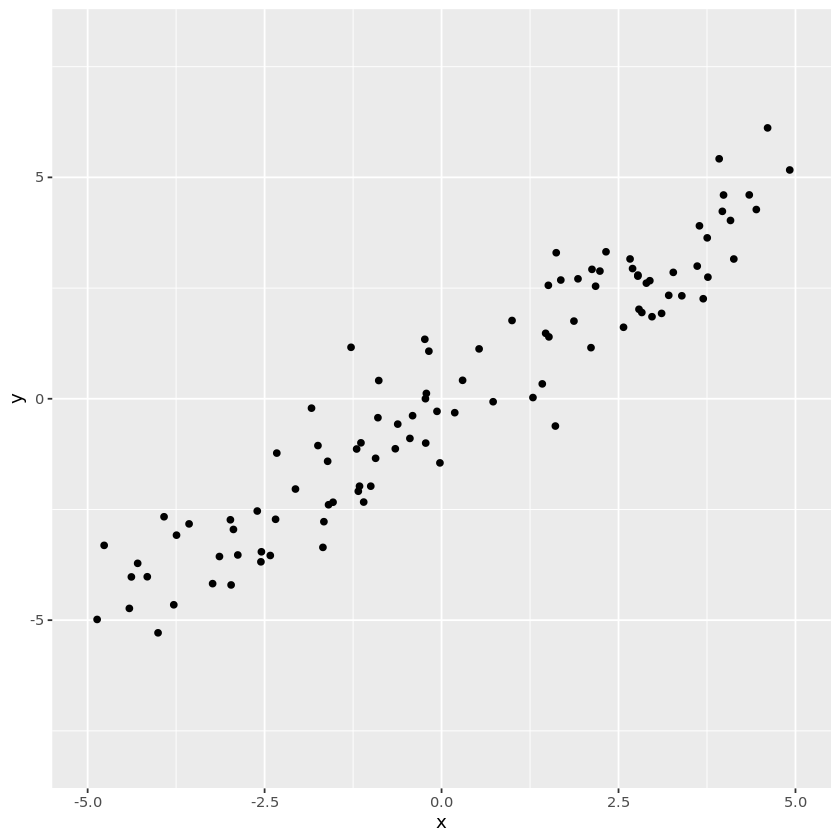

In [5]:
# サンプルデータを可視化する
graph <-
  ggplot(data = data, mapping = aes(x = x, y = y)) +
  geom_point() +
  xlim(-5, 5) +
  ylim(-5 - 1 * 3, 5 + 1 * 3)
plot(graph)

### モデルを作成する

In [6]:
# 線形回帰で x から y を予測するモデルを作成する
model <- lm(formula = y ~ x, data = data)

In [7]:
# 予測結果を得る
data$predicted <- predict(model, data)

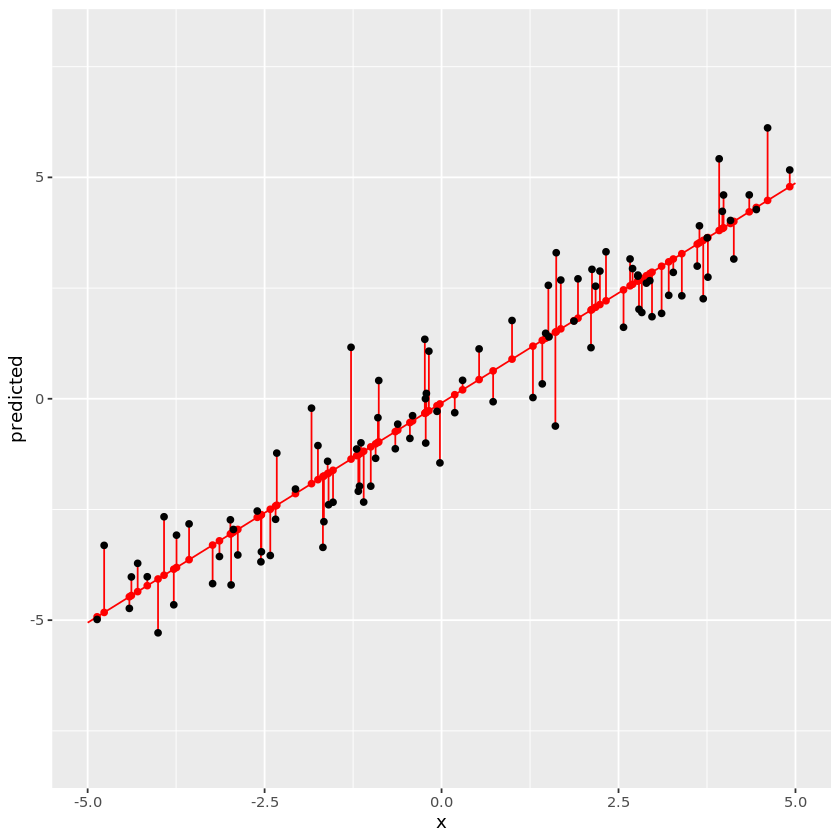

In [8]:
# モデルを可視化する
grid <- expand.grid(x = seq(-5, 5, 0.1))
grid$predicted <- predict(model, grid)
graph <-
  ggplot(data = data) +
  geom_line(data = grid, mapping = aes(x = x, y = predicted), color = "red") +
  geom_segment(mapping = aes(x = x, xend = x, y = y, yend = predicted), color = "red") +
  geom_point(mapping = aes(x = x, y = predicted), color = "red") +
  geom_point(mapping = aes(x = x, y = y)) +
  xlim(-5, 5) +
  ylim(-5 - 1 * 3, 5 + 1 * 3)
plot(graph)

### MAE を計算する

In [9]:
calc_mae(data)

[1] 0.7187027

### RMSE を計算する

In [10]:
calc_rmse(data)

[1] 0.8818049

---

## 動作環境

In [11]:
sessionInfo()

R version 3.5.2 (2018-12-20)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 10 (buster)

Matrix products: default
BLAS: /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.8.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.8.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] forcats_0.5.1   stringr_1.4.0   dplyr_1.0.4     purrr_0.3.4    
[5] readr_1.4.0     tidyr_1.1.2     tibble_3.0.6    ggplot2_3.3.3  
[9] tidyverse_1.3.0

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-5      tidyselect_1.1.0  repr_1.1.3        haven_2.3.1      
 [5] colorspace_2.0-0  vctrs_0.3.6       